In [1]:
%pylab inline
from ipywidgets import *

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Chemical master method applied to the Schlogl model
#
# Takes in parameters:
#     m:  (m) x (m) matrix, size of our system
#     k1, k2, k3, k4: Denote the reaction rates for reaction 1,2,3,4 respectively
#     na: the inital number of molecules of chemical species A
#     nb: the initial number of molecules of chemical species of B
#     tfinal: final time
#     steps: The number of steps
#

def CME(m, k1, k2, k3, k4, na, nb, tfinal, steps):
    
    from scipy.linalg import expm
    from scipy.stats import norm
    
    # Time
    t = linspace(0, tfinal, steps)
    dt = t[1] - t[0]

    # lambda and mu
    lam = lambda q1,q3,n1,n2,n: q3*n2 + q1*n1*n*(n-1)
    mu = lambda q2,q4,n: q4*n + q2*n*(n-1)*(n-2)

    ### Set up A matrix
    #Note A[j,i] => j indexes the row and i indexes the column
    for j in range(1,m-1): # iterate over rows 1 to m-2 as I want to hard code rows 0 and m-1
        for i in range(m): # iterate over all columns from 0 to m-1
            if(i == j - 1):
                A[j,i] = lam(k1,k3,na,nb, i+1)
            if(i == j):
                A[j,i] = -(lam(k1,k3,na,nb,i+1) + mu(k2,k4,i+1))
            if(i == j + 1):
                A[j,i] = mu(k2,k4,i+1)
                
    # boundaries:
    A[0,0] = -lam(k1,k3,na,nb,1)
    A[0,1] = mu(k2,k4,2)
    A[m-1,m-2] = lam(k1,k3,na,nb,m-1)
    A[m-1,m-1] = -mu(k2,k4,m)
    
    U = zeros([m, len(t)])

    num = linspace(1,m, m)

    ### Normal distribution, mean = 5 ###
    dn =norm.pdf(num, loc = (m)/2)
    U[:,0] = dn

    # Main time stepping loop
    for r in range(len(t)-1):
        U[:,r+1] = dot(expm(A*dt),U[:,r])
    
    return num,U,dt

(1, 100)

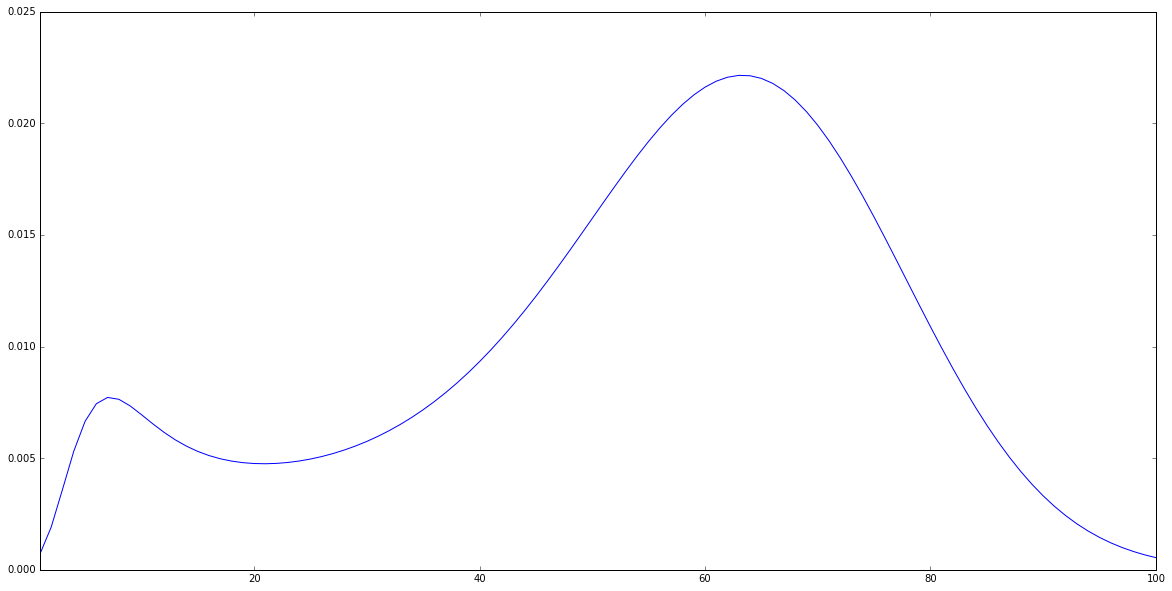

In [10]:
x110,y110, delt= CMEbath(100, 0.15, 0.0015, 18, 3.6,1,1,2, 1000)

figure(figsize = (20,10))
plot(x110, y110[:,999])
xlim([1,100])